# LECTURA DE CSV

In [3]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Leemos el csv y lo transformamos en un dataframe de pandas
path = r"C:\Bank_data.csv"
file_csv = pd.read_csv(path, sep=",")
df = pd.DataFrame(file_csv)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# ANÁLISIS EXPLORATORIO

**INFORMACIÓN GENERAL DEL DATASET**

In [5]:
# Analizamos la información general del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA


**BÚSQUEDA Y TRATAMIENTO DE VALORES NULOS**

In [6]:
# Averiguamos cuántos valores nulos hay en cada variable
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# Generamos una copia del df y reemplazamos los nulos con el valor de la media de cada variable
df2 = df.copy()
df2['CREDIT_LIMIT'].fillna(df2['CREDIT_LIMIT'].mean(), inplace = True)
df2['MINIMUM_PAYMENTS'].fillna(df2['MINIMUM_PAYMENTS'].mean(), inplace = True)

In [8]:
# Comprobamos que ya no hayan valores nulos
df2.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# Generamos las estadísticas descriptivas del dataset
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Como conclusiones, podemos observar que: 

El saldo promedio en cuenta es de $1564, lo que sugiere que los clientes mantienen un saldo significativo en sus cuentas en promedio.

La frecuencia promedio de mantener el saldo es alta, con un valor de 0.88, lo que indica que la mayoría de los clientes mantienen su saldo con regularidad.

El monto promedio de compras es de $1003, demostrando que los clientes realizan compras regularmente utilizando sus tarjetas de crédito.

El monto promedio de compras únicas es de $592, lo que sugiere que los clientes tienden a realizar compras individuales de menor cuantía en lugar de compras grandes y únicas.

El número promedio de transacciones de compras es de aproximadamente 14, dejando en evidencia que los clientes realizan varias transacciones de compras.

El límite de crédito promedio es de $4494, lo que indica el máximo total que los clientes pueden gastar utilizando sus tarjetas de crédito.

La proporción promedio de pago completo de la factura de crédito es de aproximadamente 0.15, lo que sugiere que la mayoría de los clientes no pagan el saldo total de su factura de crédito cada mes.

La duración promedio de la relación con el banco es de aproximadamente 11.5 años, lo que indica una relación a largo plazo entre los clientes y el banco.

A su vez, no se observan valores atípicos extremos en las estadísticas proporcionadas. Sin embargo, sería prudente realizar un análisis adicional para identificar cualquier valor atípico que pueda tener un impacto significativo en el análisis de segmentación de clientes.

In [10]:
# Se buscan valores duplicados
print("Hay {} valores duplicados".format(df2.duplicated().sum()))

Hay 0 valores duplicados


In [11]:
# Se crea una nueva copia del df y se eliminan las columnas innecesarias para el análisis.
df3 = df2.copy()
df3 = df3.drop('CUST_ID', axis=1)
df3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



**BÚSQUEDA Y TRATAMIENTO DE VALORES ATÍPICOS**

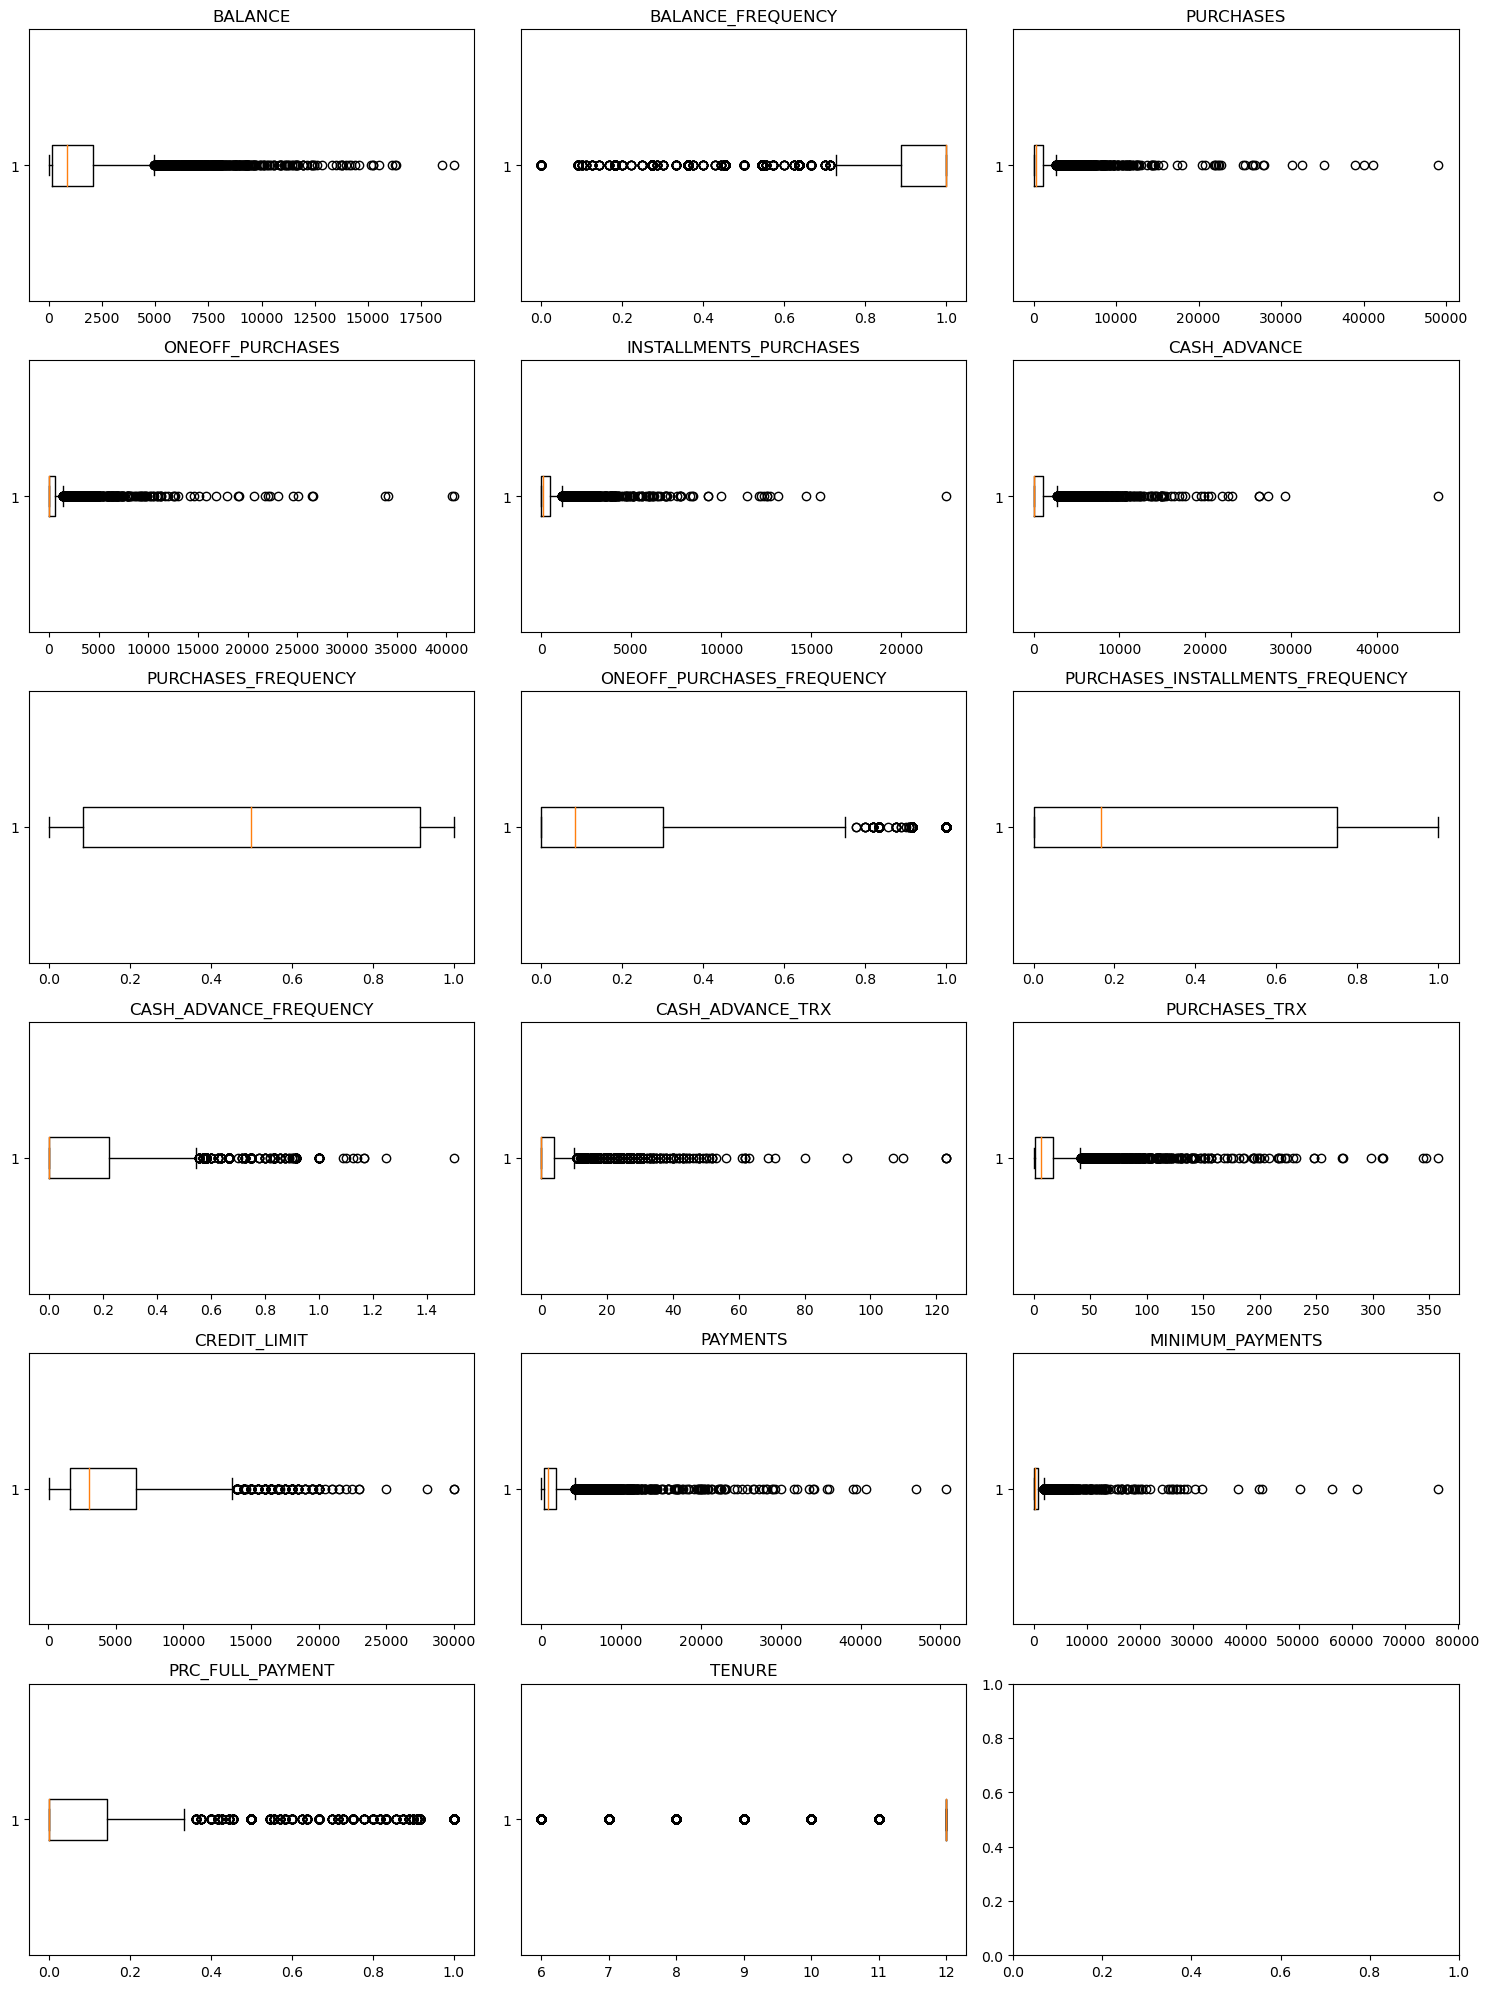

In [12]:
import matplotlib.pyplot as plt

# Se crean subplots para cada variable
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axs = axs.flatten()

# Generamos un diagrama de caja para cada variable
for i, var in enumerate(df3.columns):  # Iteramos directamente sobre las columnas del df
    axs[i].boxplot(df3[var].dropna(), vert=False)
    axs[i].set_title(var)

plt.tight_layout()
plt.show()


In [13]:
# Comprobación de valores outliers mediante el rango intercuartílico

stats = df3.describe()

for column in df3.select_dtypes(include = "number"):
    Q1 = stats[column]['25%']
    Q3 = stats[column]['75%']
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df3.loc[(df3[column] < lower_limit) | (df3[column] > upper_limit)]
    
    print(f"Columna: {column}")
    print(outliers)
    print("------------------------")

Columna: BALANCE
           BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
15     6886.213231           1.000000    1611.70              0.00   
21     6369.531318           1.000000    6359.95           5910.04   
24     5368.571219           1.000000       0.00              0.00   
28     7152.864372           1.000000     387.05            204.55   
30    12136.219960           1.000000    3038.01           1013.20   
...            ...                ...        ...               ...   
8309   6008.914524           0.777778       0.00              0.00   
8411   5934.610587           1.000000       0.00              0.00   
8438   5484.339435           1.000000       0.00              0.00   
8705   7302.672686           1.000000       0.00              0.00   
8941   5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
15                   1611.70   2301.491267             0.500000   
21      

Si bien parecen existir valores atípicos, considero que dichos valores pueden contener información importante 
sobre el comportamiento o caracteristicas especificas de ciertos clientes, por lo que es mejor no tratarlos. 

**ANÁLISIS DE LA MATRIZ DE CORRELACIÓN**

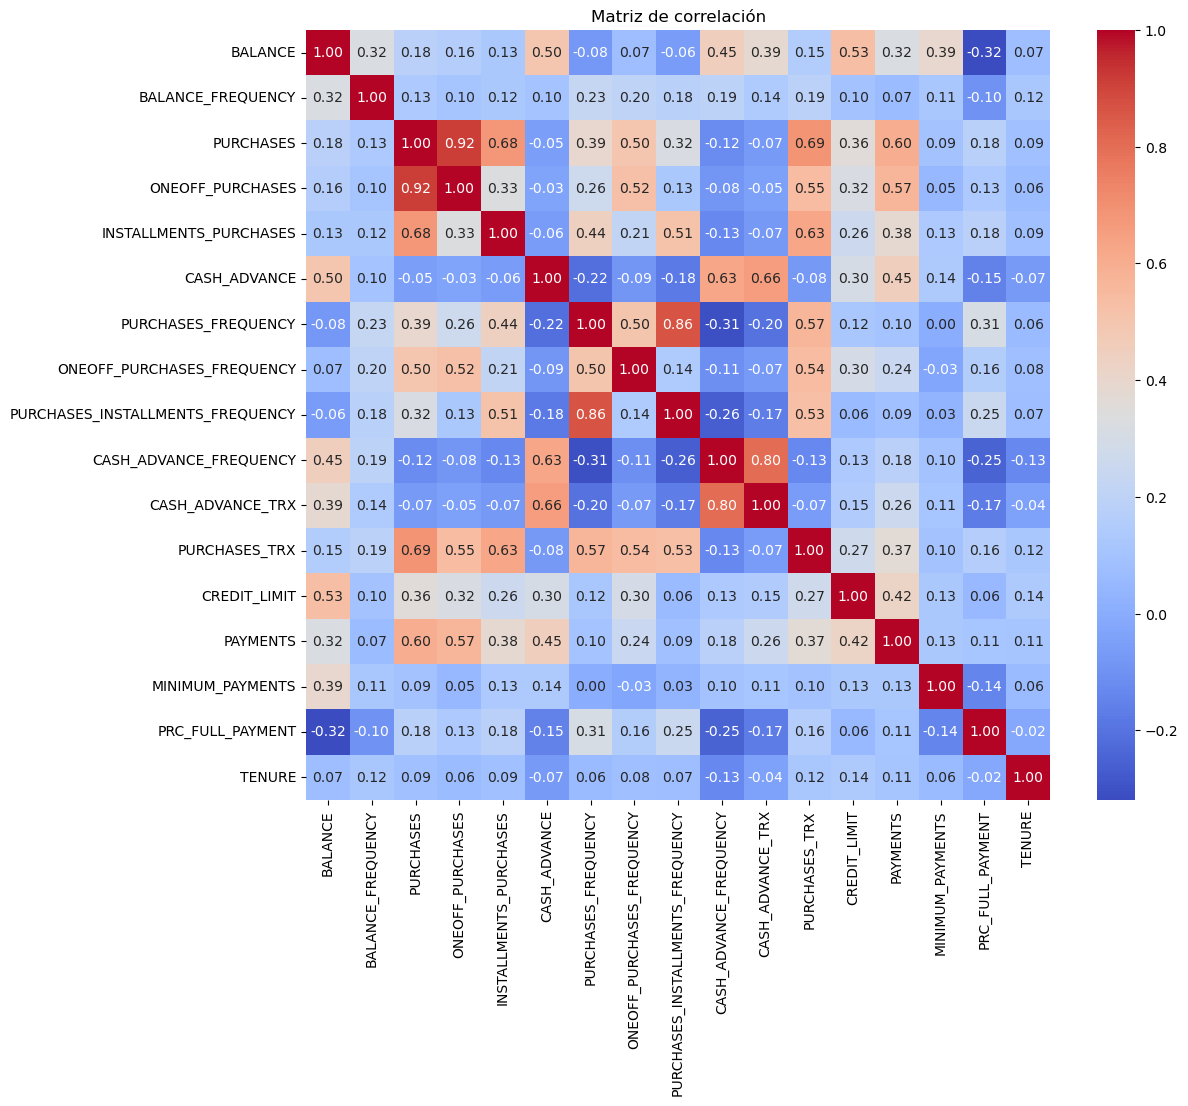

In [15]:
matriz_correlacion = df3.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

De la matriz de correlación anterior, podemos observar lo siguiente:

La variable 'PURCHASES' está altamente correlacionada con las variables 'PAYMENTS', 'PURCHASES_TRX', 'ONEOFF_PURCHASES_FREQUENCY',
'INSTALLMENTS_PURCHASES' y 'ONEOFF_PURCHASES'.

La variable 'CASH_ADVANCE' está correlacionada con las variables 'PAYMENTS', 'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FRECUENCY', 'BALANCE'.


**ESTANDARIZACIÓN DE DATOS**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df4 = scaler.fit_transform(df3)

df4 = pd.DataFrame(df4, columns=df3.columns)

df4.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


# APLICACIÓN DEL ALGORITMO DE KMEANS

**EVALUACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO EN K-MEANS**

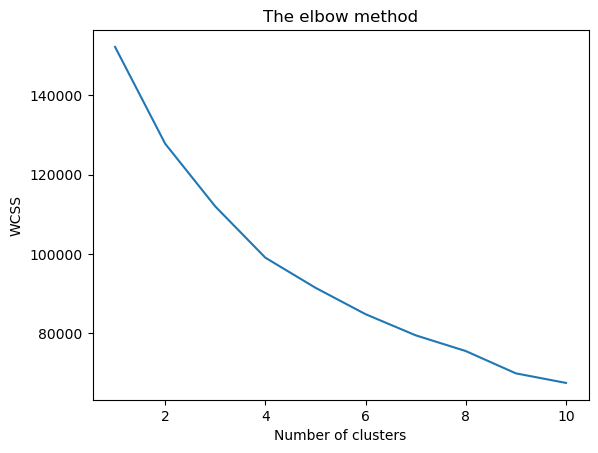

In [17]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(df4)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

En este punto, podemos notar un codo en el gráfico de inercia cuando el número de clusters es 4

Por lo tanto, el número óptimo de clusters parece ser 4

**APLICACIÓN DE K-MEANS CON EL NÚMERO ÓPTIMO DE CLUSTERS PARA LA SEGMENTACIÓN DE CLIENTES**

In [22]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df4)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

**VISUALIZACIÓN DE LAS COORDENADAS DE LOS CENTROIDES DE LOS CLUSTERS EN UN DATAFRAME**

In [58]:
# Creamos un DataFrame 'cluster_centers' para almacenar las coordenadas de cada centroide.
# Cada columna de 'cluster_centers' representa una característica, mientras que cada característica 
# corresponde a una dimensión y a un punto de coordenadas en el espacio multidimensional.

centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df3.columns])
centroides


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
1,1.452115,0.384506,-0.235885,-0.164921,-0.254845,1.683723,-0.508323,-0.215413,-0.452391,1.743805,1.612158,-0.285237,0.833647,0.602309,0.487783,-0.405405,-0.100688
2,-0.266329,-0.370199,-0.343003,-0.230312,-0.387701,-0.184398,-0.797284,-0.388997,-0.714047,-0.104108,-0.166236,-0.474822,-0.334871,-0.263128,-0.119376,-0.258898,-0.051819
3,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140


In [59]:
# Para una mejor comprensión, realizaremos una conversión inversa. Esto nos permitirá visualizar 
# la ubicación de los centroides de cada cluster y cómo kmeans ha agrupado los datos.

# Convertimos los centroides normalizados de nuevo a su escala original
centroides_df = scaler.inverse_transform(centroides)

# Creamos un DataFrame 'cluster_centers_df' para almacenar las coordenadas de los centroides
# en su escala original, donde cada columna representa una característica.
centroides_df = pd.DataFrame(data=centroides_df, columns=[df3.columns])
centroides_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
1,4586.930606,0.968357,499.232921,318.702631,180.614664,4509.716842,0.286336,0.138196,0.184646,0.484097,14.250622,7.619917,7527.597133,3476.770125,2000.964110,0.035141,11.382573
2,1010.134297,0.789574,270.373016,210.166279,60.474230,592.178901,0.170362,0.086412,0.080657,0.114311,2.114386,2.907533,3276.051344,971.412732,586.005760,0.077991,11.447972
3,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100


Basándonos en los valores promedio de cada variable para cada grupo de clientes, podemos obtener detalles sobre cada grupo:

<ins>Grupo 0</ins>:

**Balance y límite de crédito moderados**: Tienen un balance promedio y un límite de crédito promedio relativamente moderados.

**Compras frecuentes y variadas**: Tienen valores promedio moderados tanto para compras únicas como para compras a plazos. Esto sugiere que realizan compras con regularidad y en diferentes formas (tanto compras únicas como en cuotas).

**Bajo uso de adelantos de efectivo**: Tienen un bajo valor promedio de adelantos de efectivo, indicando que no dependen mucho de los adelantos en efectivo.

**Hábitos de pago razonables**: Tienen un porcentaje promedio de pagos completos razonablemente alto, lo que sugiere una gestión financiera sólida.

<u> Grupo 1</u>:

**Balance y límite de crédito altos**: Tienen un balance promedio y un límite de crédito promedio relativamente altos.

**Compras muy altas**: Tienen valores promedio muy altos tanto para compras únicas como para compras a plazos, indicando un alto nivel de gasto.

**Bajo uso de adelantos de efectivo**: Tienen un bajo valor promedio de avance en efectivo, lo que sugiere que no dependen mucho de los adelantos de efectivo.

**Hábitos de pago razonables**: Tienen un porcentaje promedio de pagos completos razonablemente alto.

<u> Grupo 2</u>:

**Balance y límite de crédito bajos**: Tienen un balance promedio y un límite de crédito promedio relativamente bajos.

**Bajas compras**: Tienen valores promedio bajos tanto para compras únicas como para compras a plazos.

**Uso mínimo de adelantos de efectivo**: Tienen un bajo valor promedio de adelantos de efectivo.

**Hábitos de pago bajos**: Tienen un porcentaje promedio de pagos completos relativamente bajo.

<u> Grupo 3</u>:

**Balance y límite de crédito altos**: Tienen un balance promedio y un límite de crédito promedio relativamente altos.

**Compras moderadas**: Tienen valores promedio moderados tanto para compras únicas como para compras a plazos.

**Alto uso de adelantos de efectivo**: Tienen un alto valor promedio de adelantos de efectivo, lo que sugiere una mayor dependencia de los adelantos de efectivo.

**Hábitos de pago bajos**: Tienen un porcentaje promedio de pagos completos relativamente bajo.

In [60]:
## Este código utiliza el modelo KMeans previamente entrenado para predecir a qué grupo pertenece cada cliente en el conjunto de datos.
# Utilizando el método 'predict', el modelo asigna a cada cliente una etiqueta que indica a qué segmento o cluster pertenece según las características del cliente.
# Las etiquetas de los grupos asignadas a cada cliente se almacenan en la variable 'y_kmeans', lo que nos permite identificar la categoría a la que pertenece cada cliente según el modelo KMeans.

y_kmeans = kmeans.predict(df4)

In [61]:
y_kmeans

array([2, 1, 0, ..., 0, 2, 2])

In [62]:
# En este paso, concatenamos las etiquetas de los clusters ('y_kmeans') predichas por el modelo KMeans al DataFrame original 'df3'.
# Creamos un nuevo DataFrame llamado 'df5' que contiene todas las características originales de los clientes junto con la columna adicional 'cluster', que indica a qué segmento o cluster pertenece cada cliente según la predicción del modelo KMeans.
# Esto nos permite tener una visión completa de cómo se agrupan los clientes en diferentes segmentos en función de sus características.

df5 = pd.concat([df3, pd.DataFrame({'cluster':y_kmeans})], axis=1)

In [63]:
df5.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [64]:
# En este paso, examinamos la distribución de las etiquetas de los clusters ('cluster') creadas por el modelo KMeans en el DataFrame 'df5'.
# Utilizando el método 'value_counts()', contamos cuántos clientes pertenecen a cada cluster y mostramos el recuento de clientes en cada uno de ellos.
# Esto nos proporciona información sobre cómo están distribuidos los clientes entre los diferentes segmentos o clusters identificados por el modelo KMeans.

df5.cluster.value_counts()

2    3969
0    3367
1    1205
3     409
Name: cluster, dtype: int64

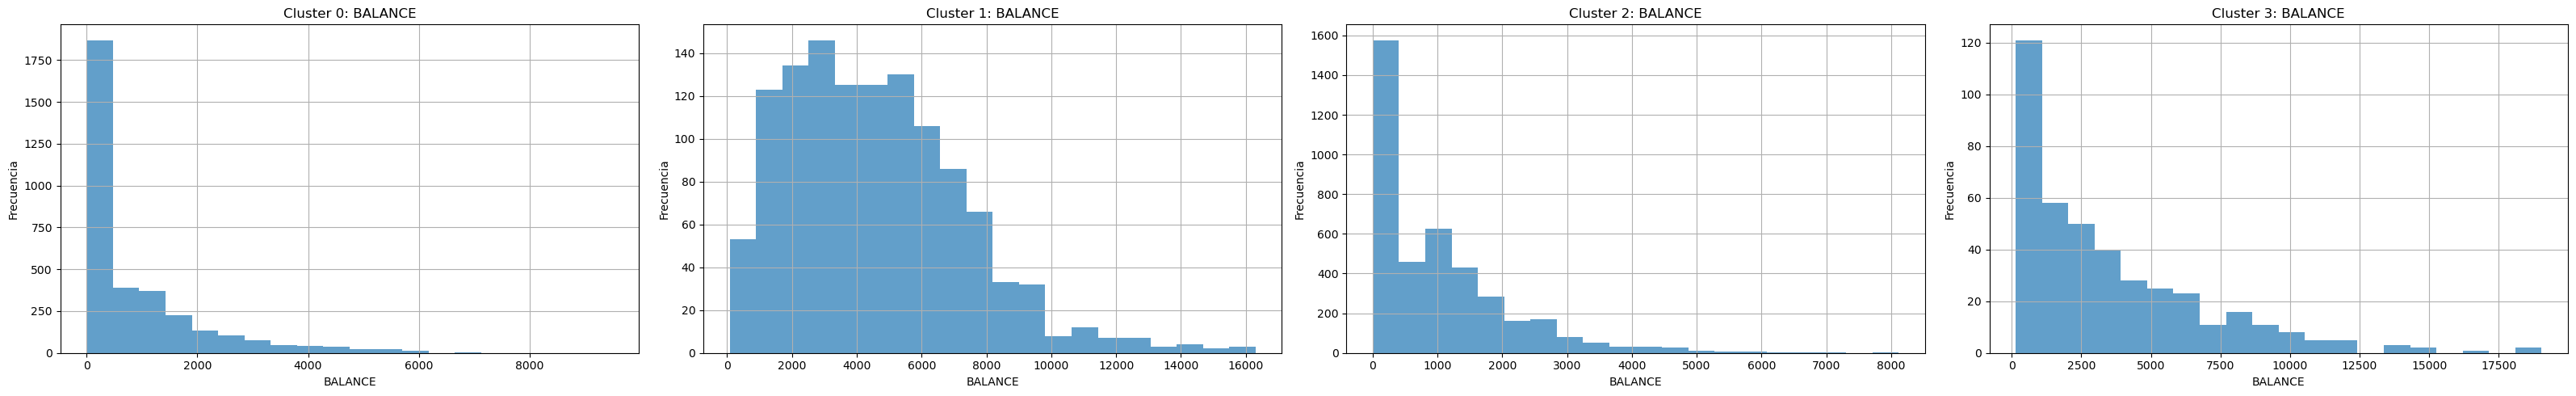

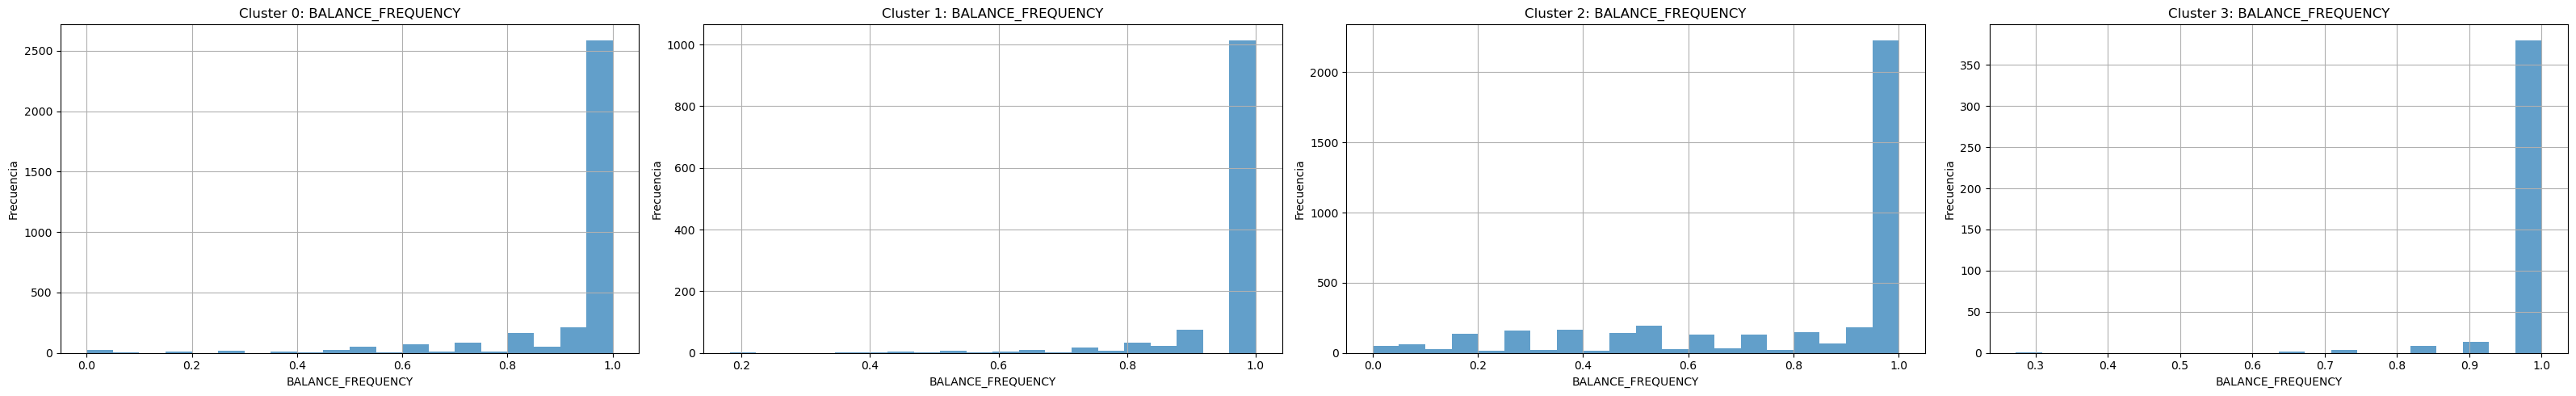

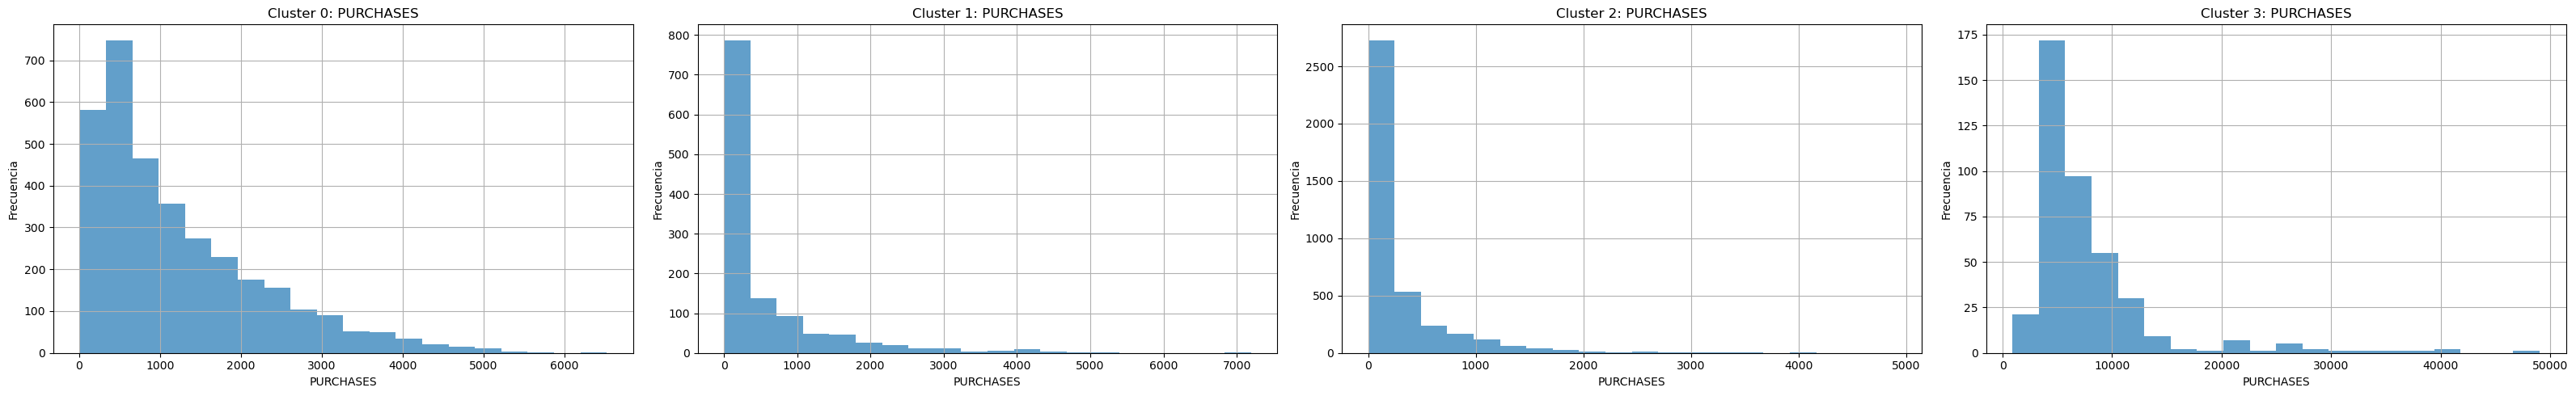

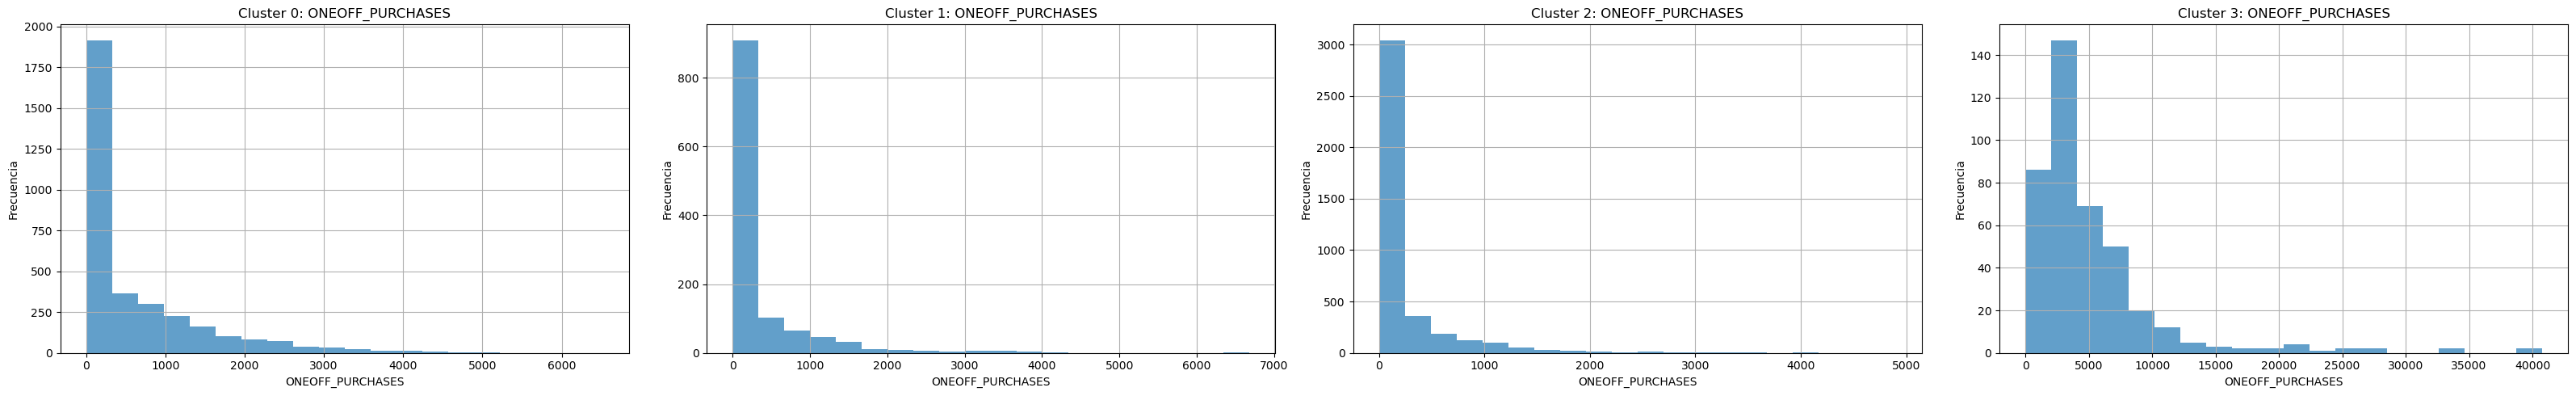

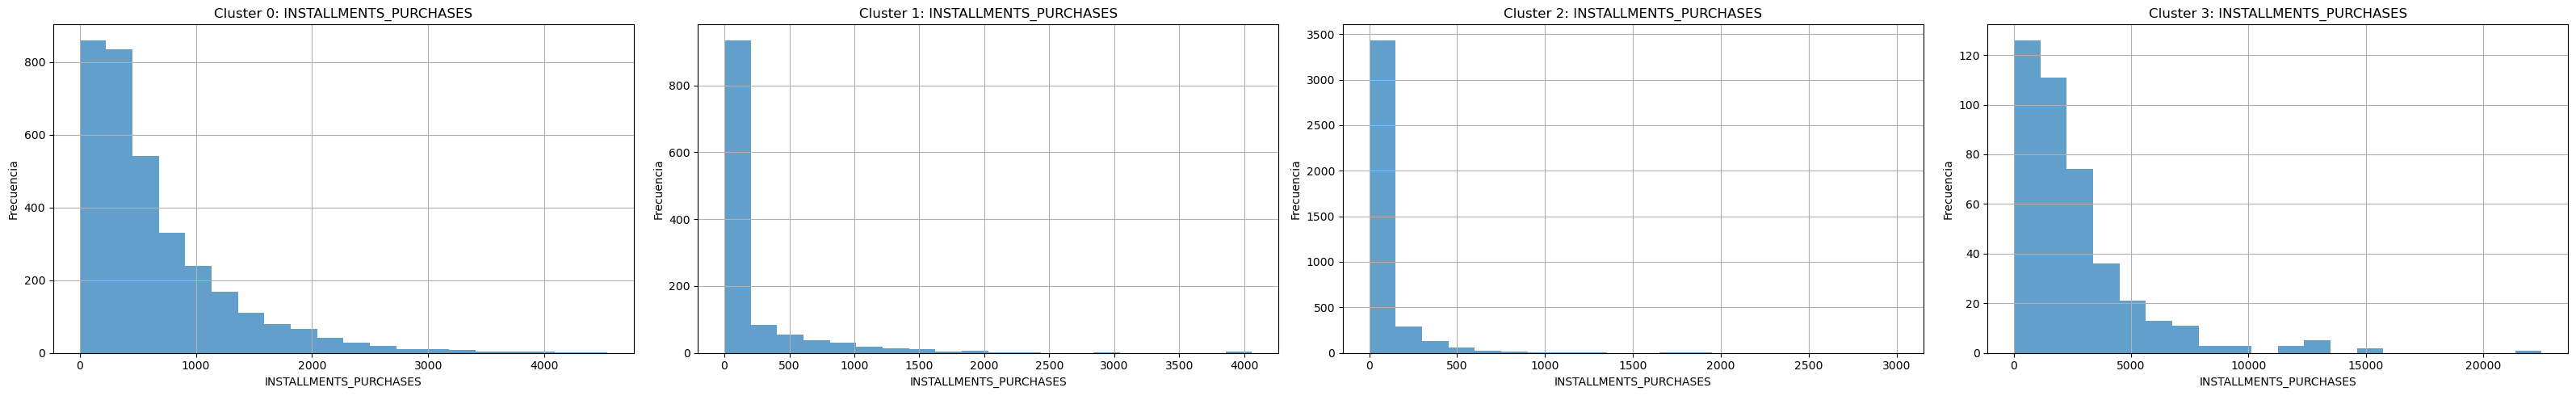

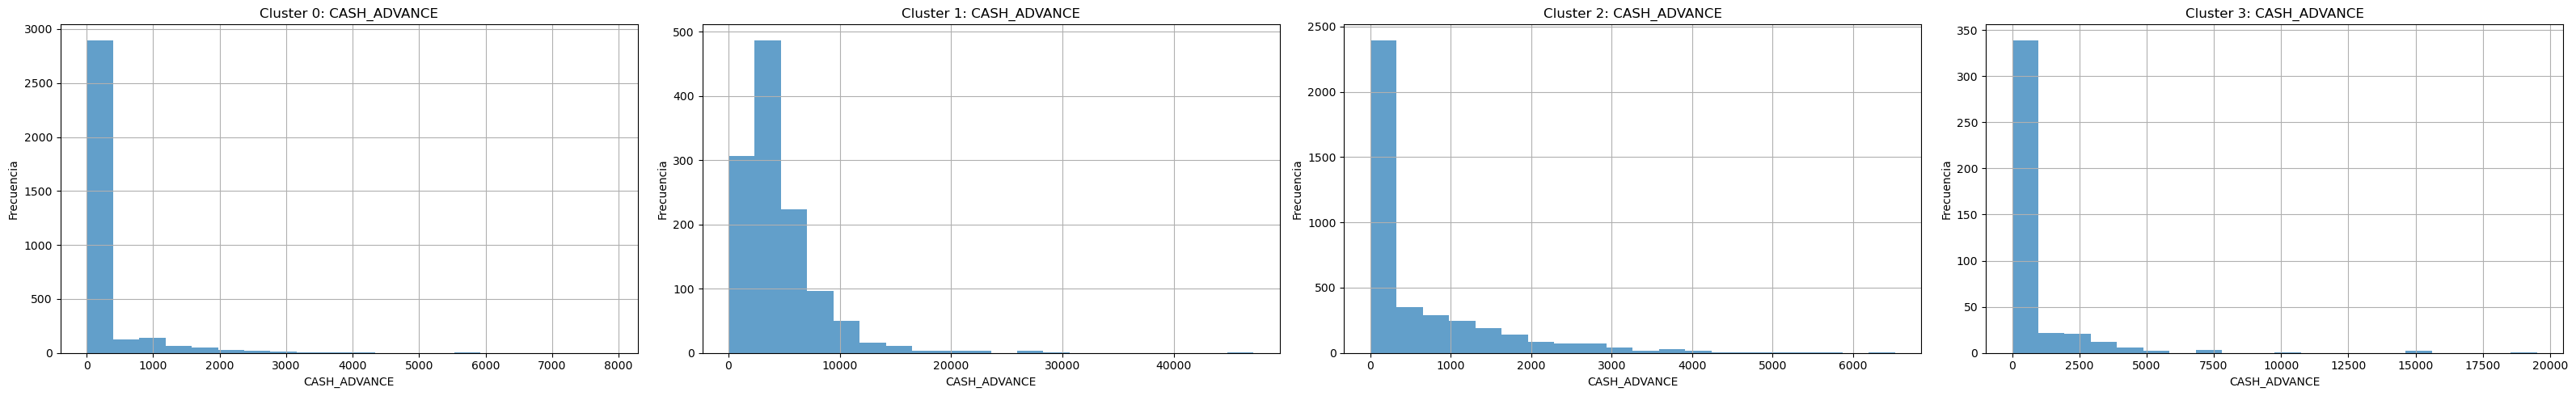

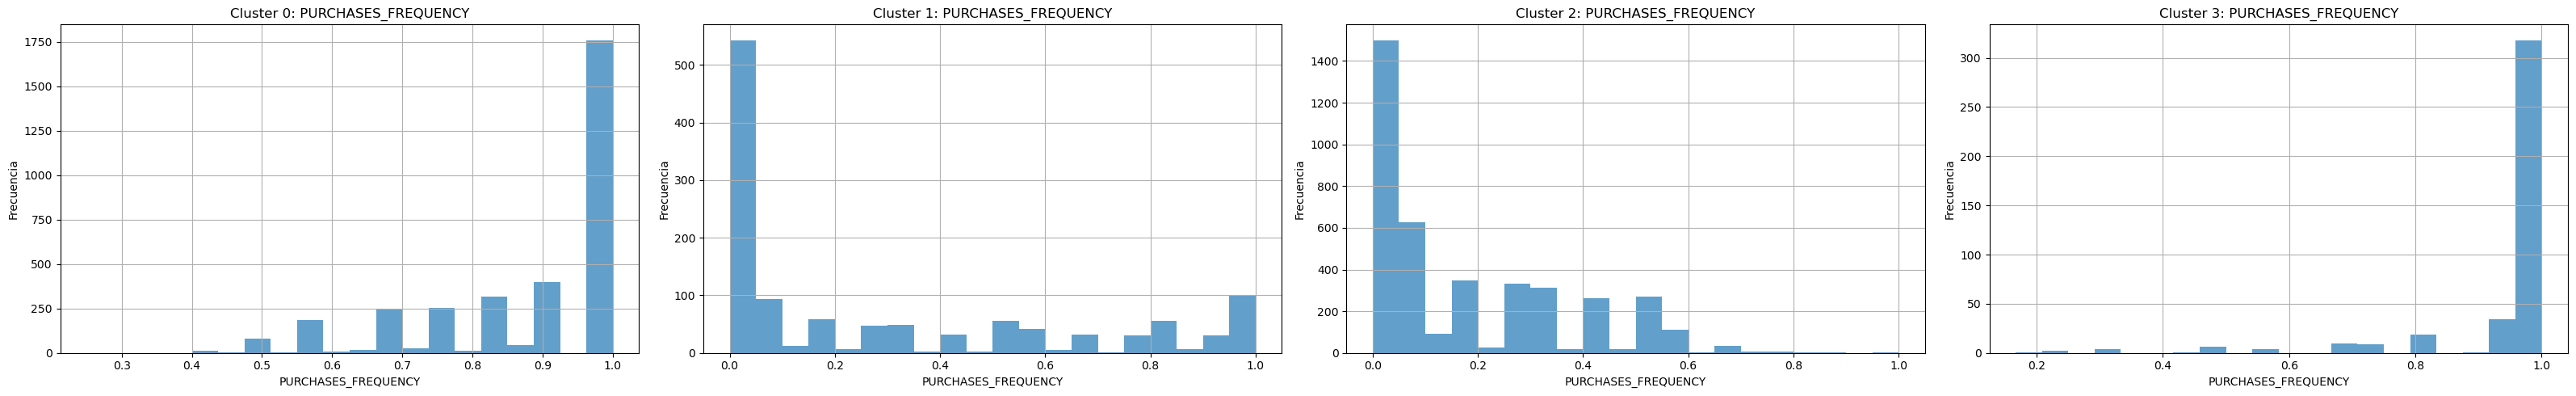

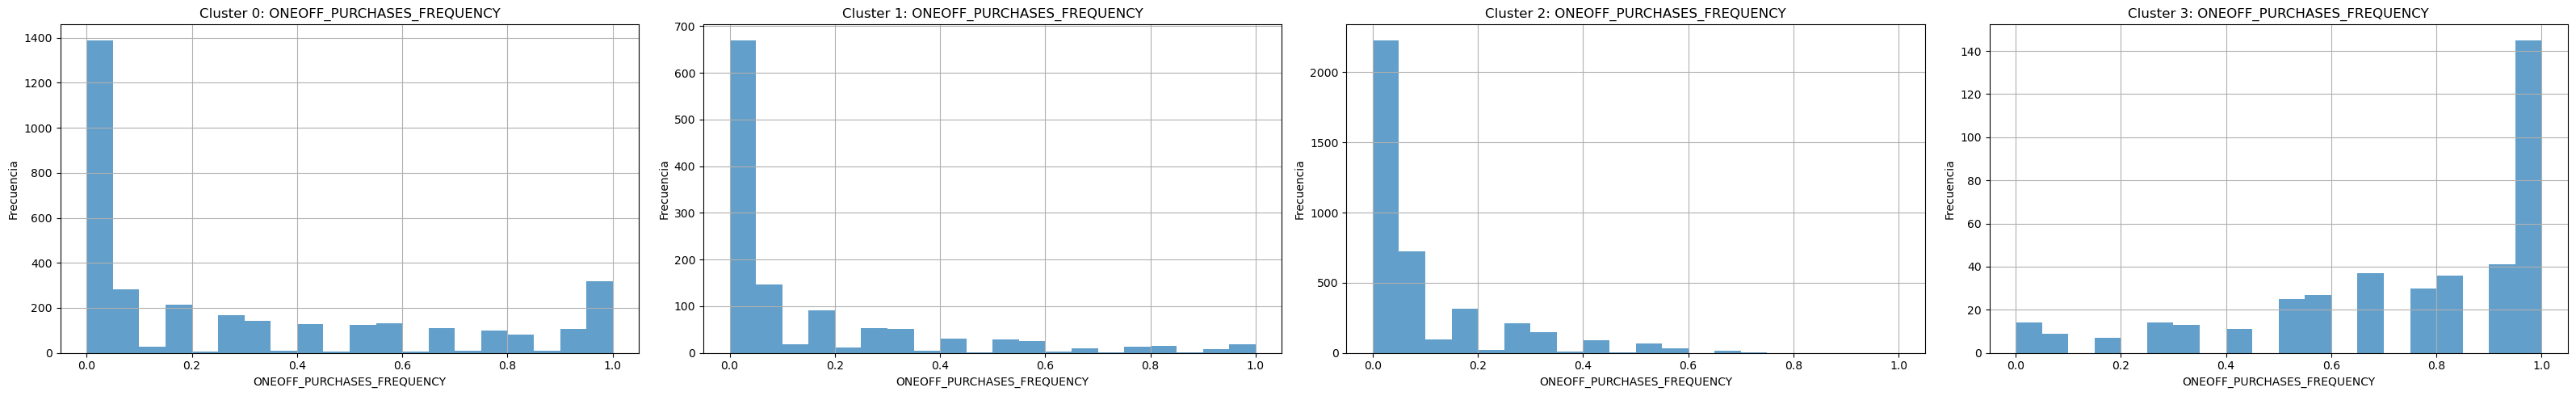

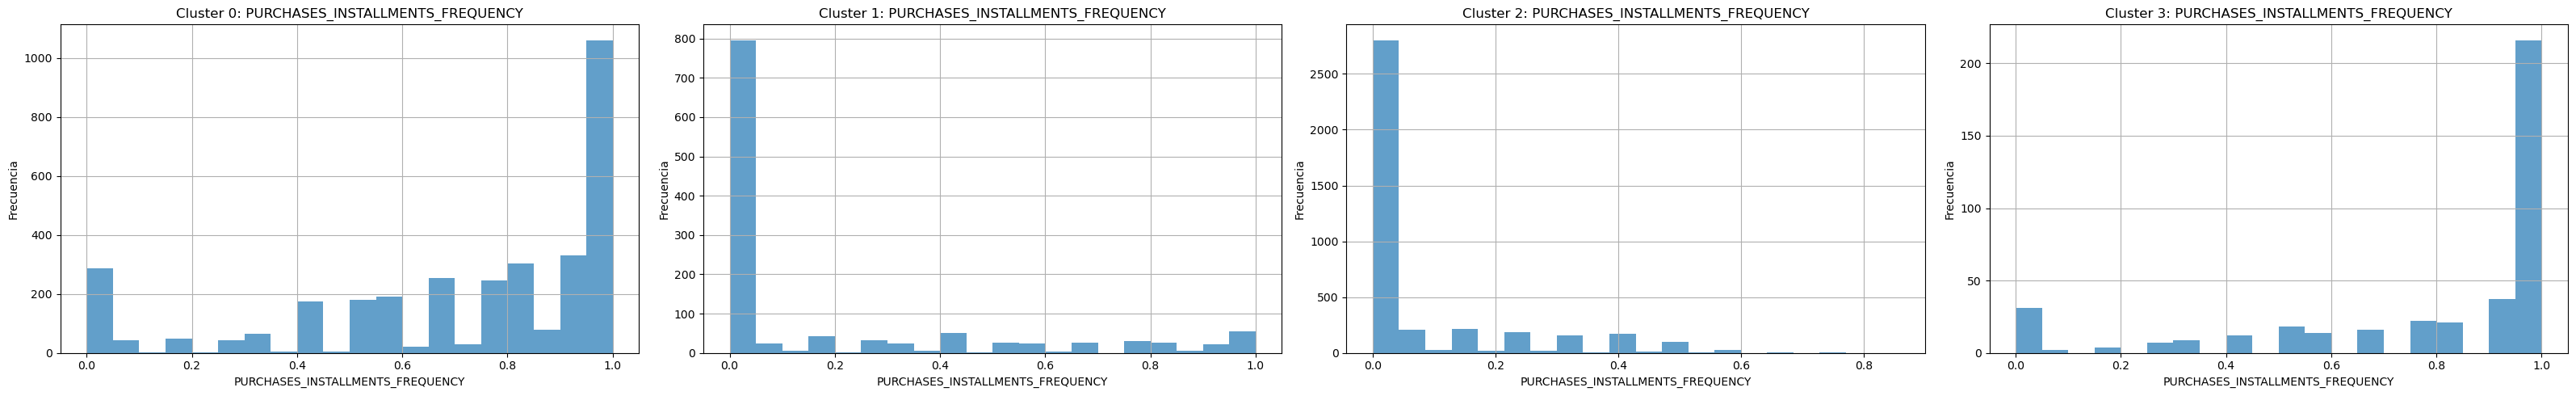

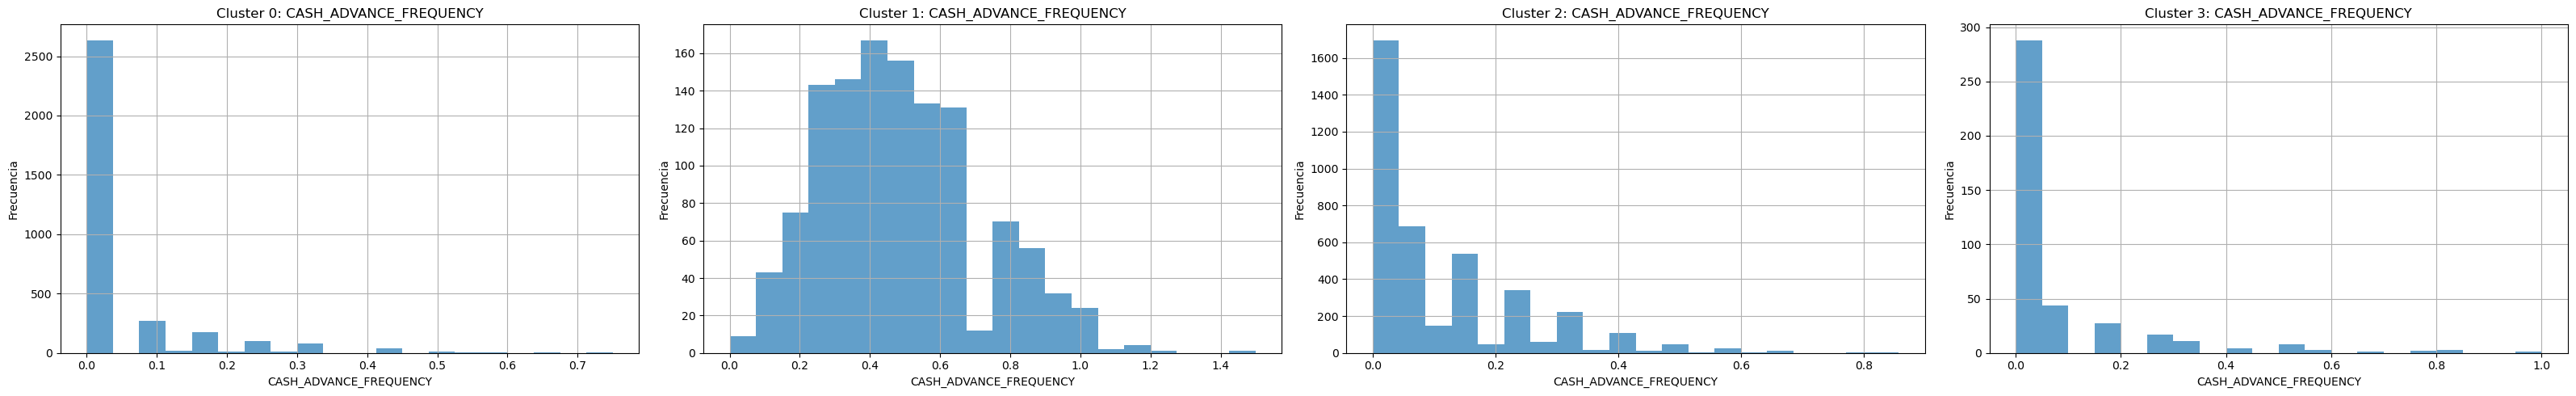

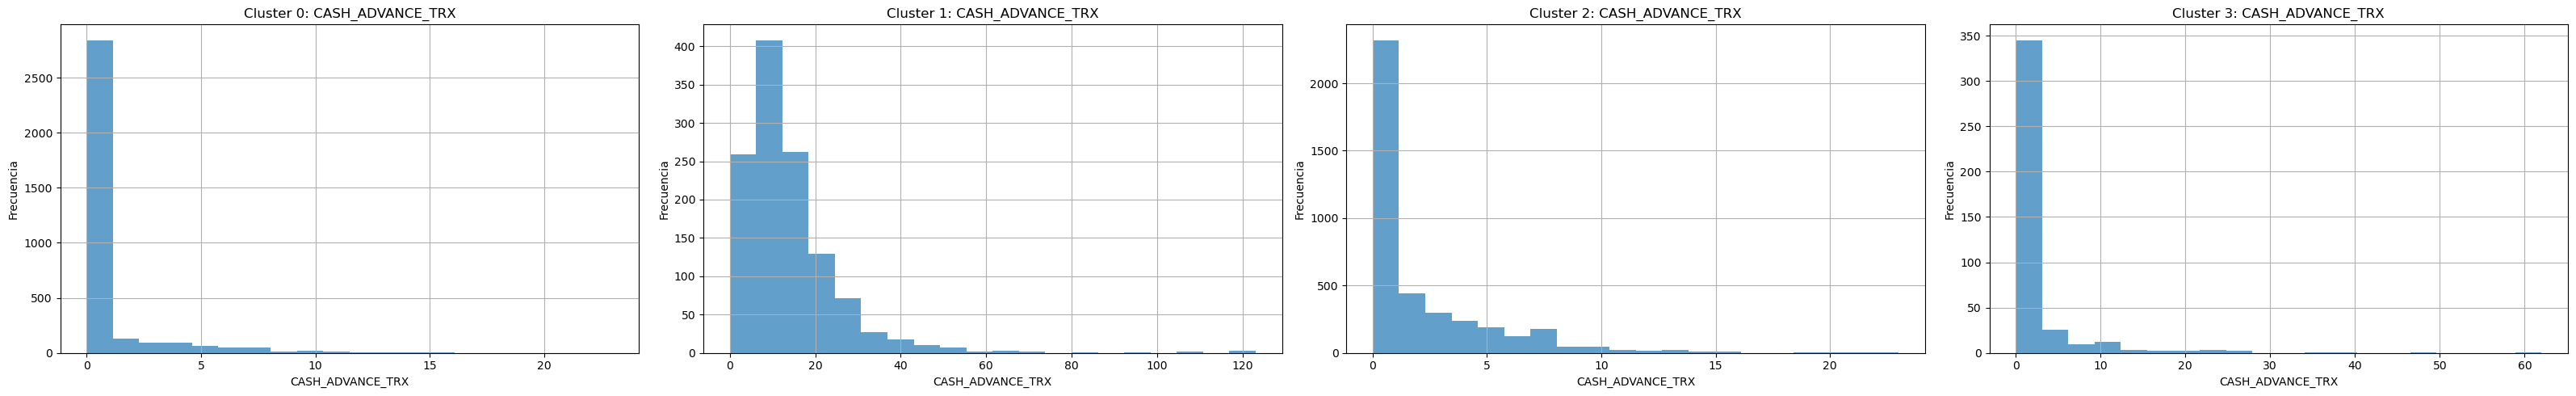

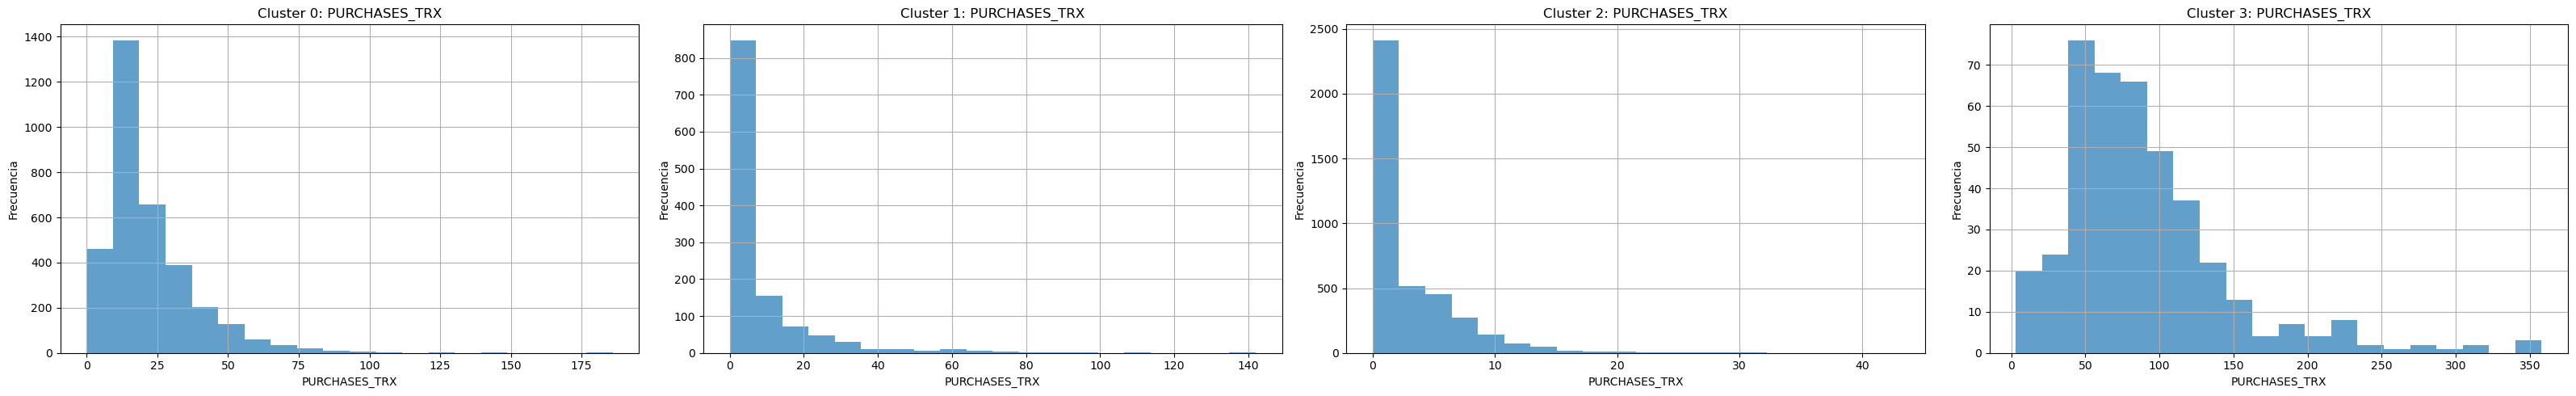

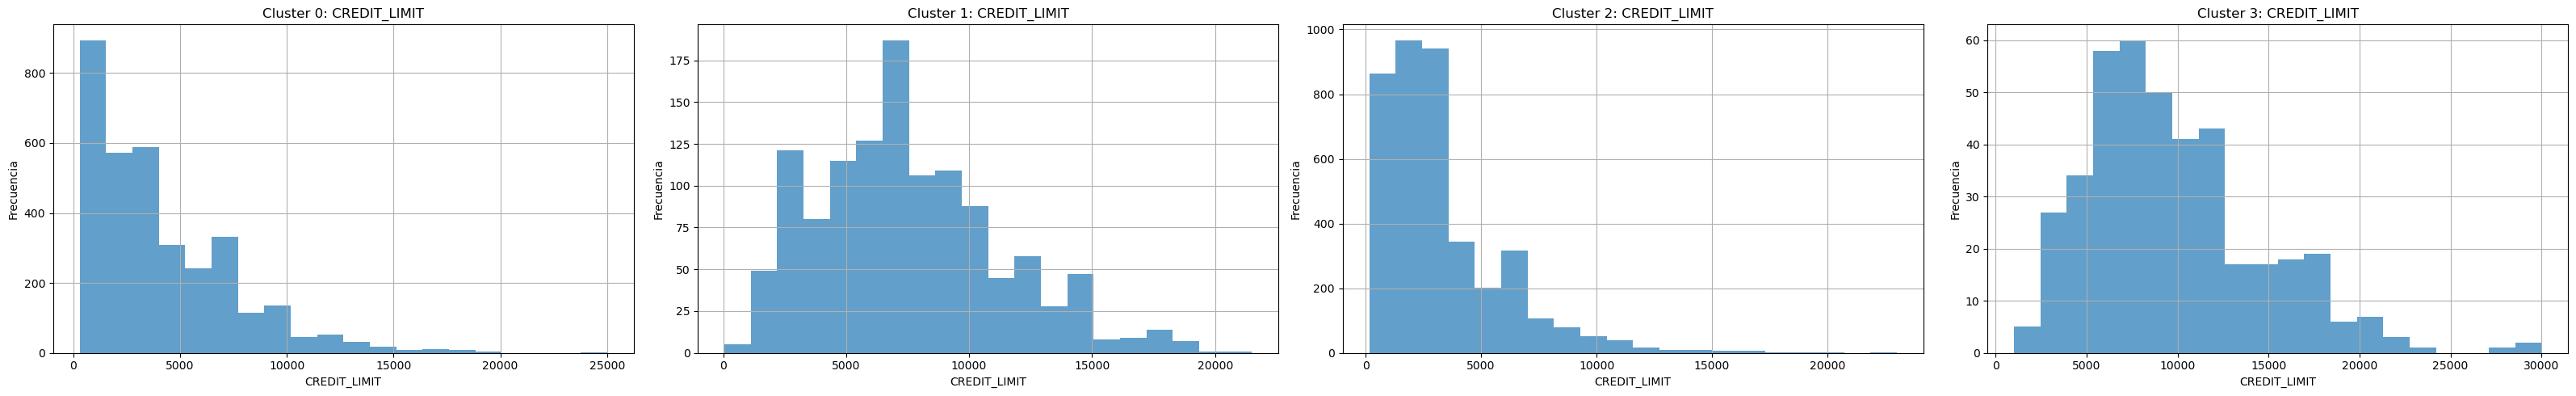

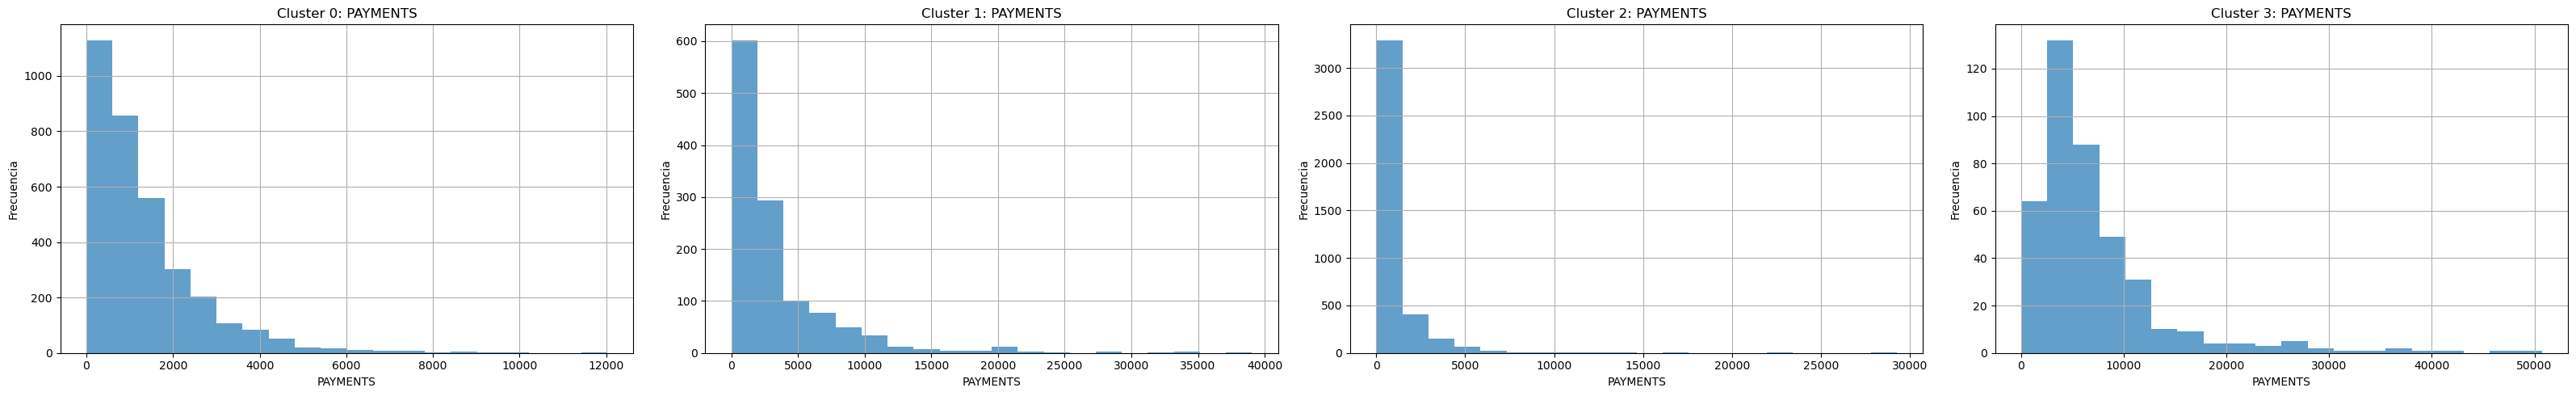

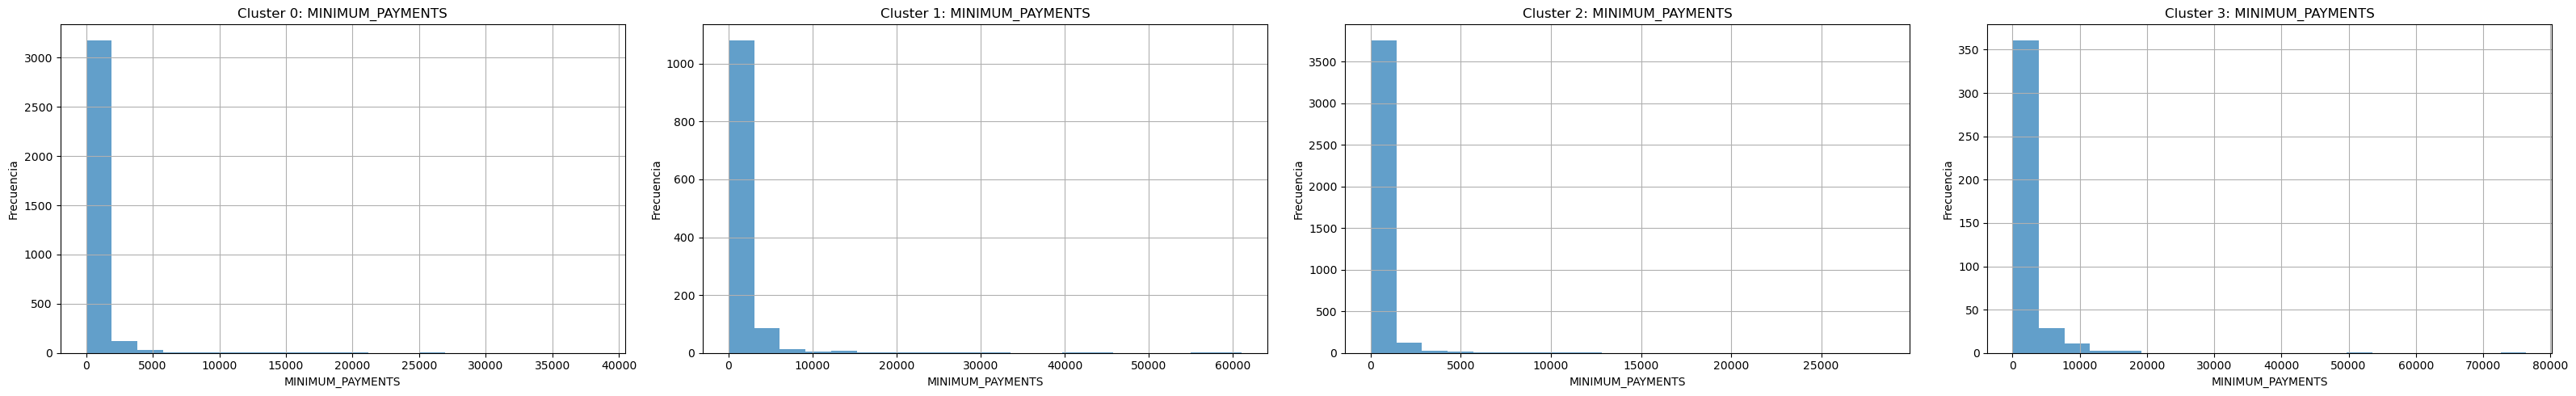

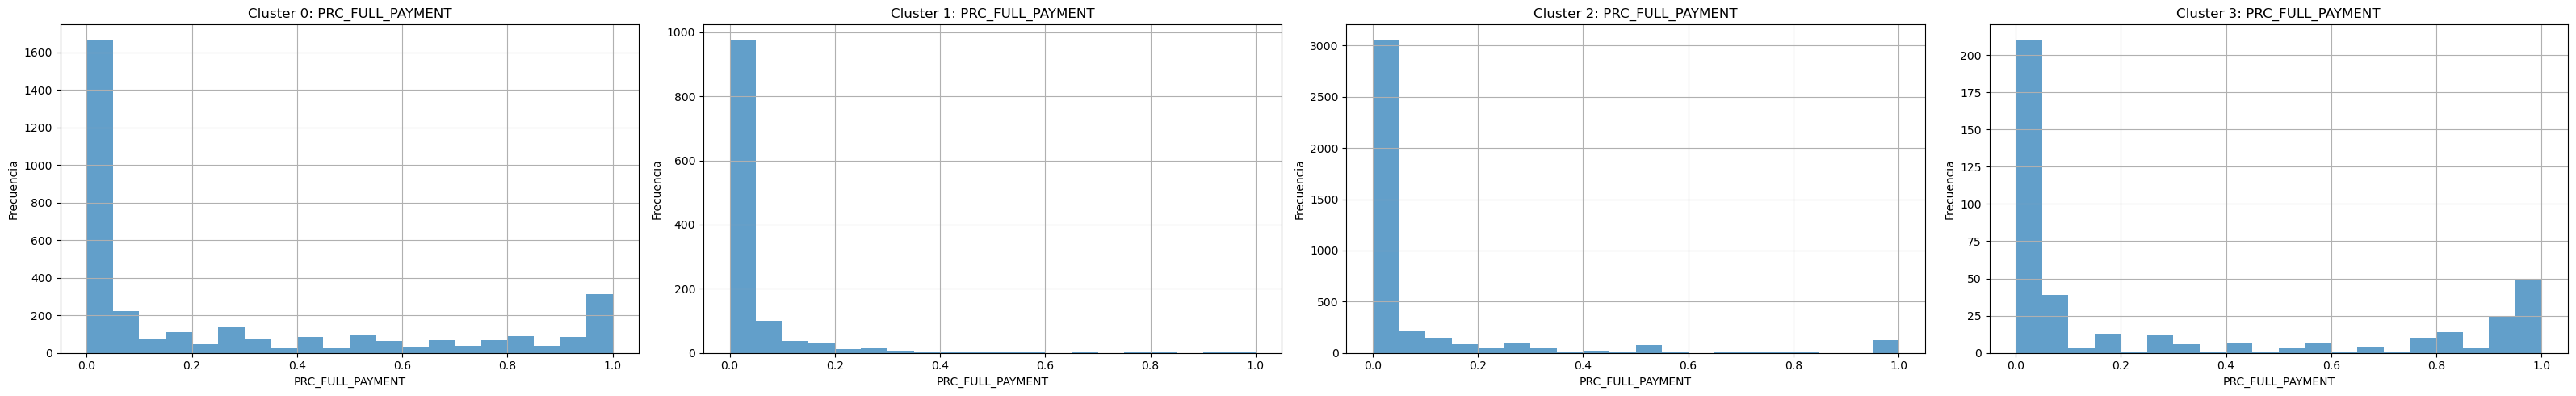

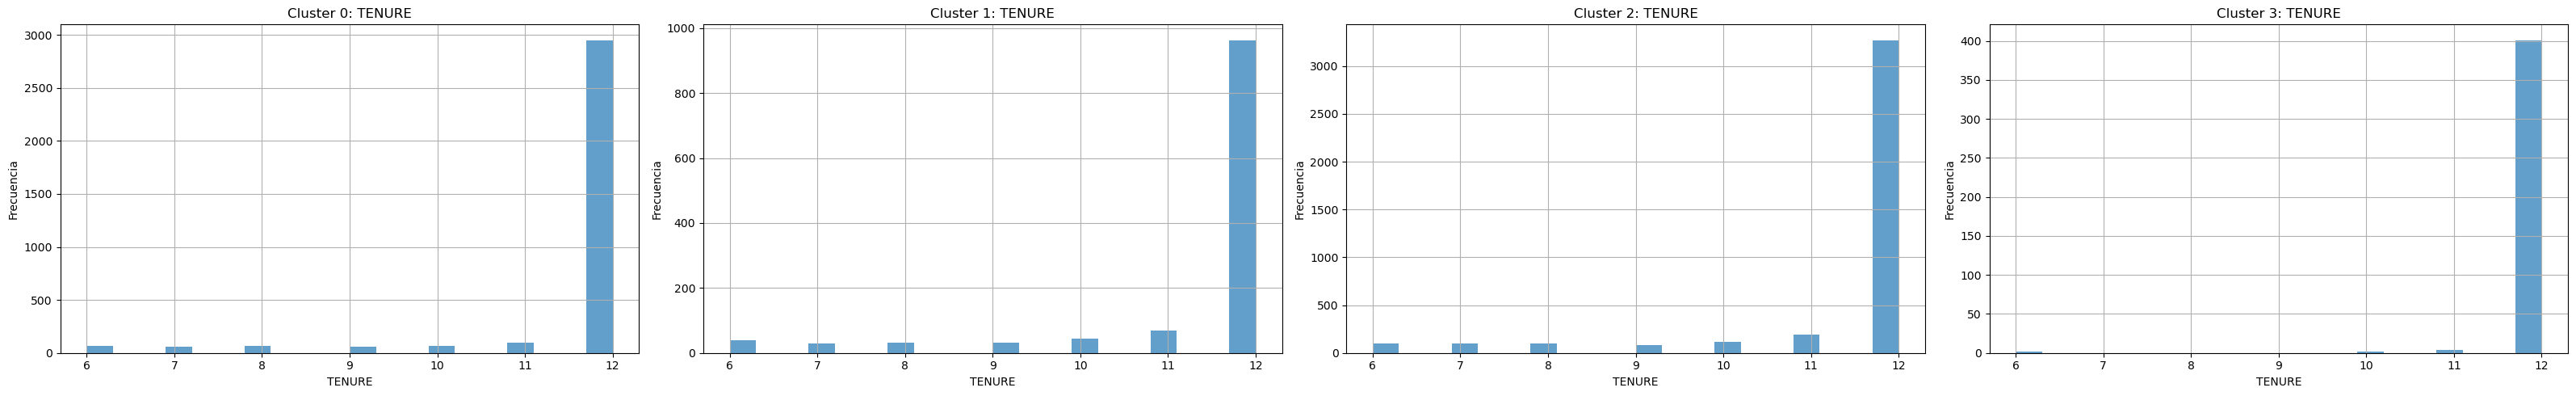

In [65]:
# Calculamos el número de columnas necesarias para los subplots
num_clusters = 4
num_features = len(df3.columns)
num_cols = min(num_clusters, num_features)

# Realizamos un histograma de cada cluster para visualizar mejor sus características
for feature in df3.columns:
    plt.figure(figsize=(num_cols * 8, 5))
    for cluster_label in range(num_clusters):
        plt.subplot(1, num_cols, cluster_label + 1)
        cluster_data = df5[df5['cluster'] == cluster_label]
        cluster_data[feature].hist(bins=20, alpha=0.7)
        plt.title('Cluster {}: {}'.format(cluster_label, feature))
        plt.xlabel(feature)
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


# REDUCCIÓN DE DIMENSIONALIDAD (PCA)

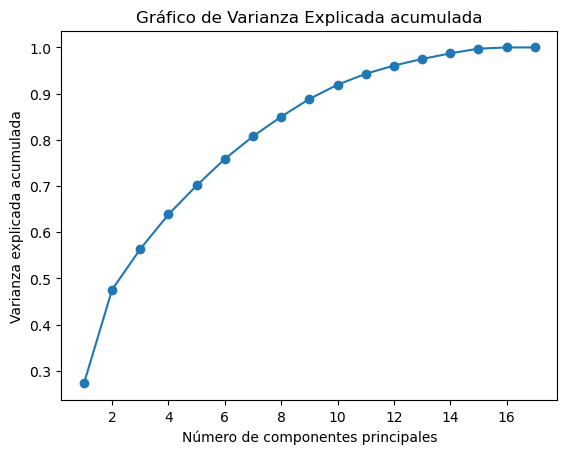

In [66]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Calculamos la varianza explicada para cada componente principal
pca = PCA()
pca.fit(df4)
explained_variance_ratio = pca.explained_variance_ratio_

# Graficamos la varianza explicada acumulada
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='-')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Gráfico de Varianza Explicada acumulada')
plt.show()


In [67]:
# Imprimimos para ver qué parte de la información total aporta cada PC
print(pca.explained_variance_ratio_.round(2)[:10])

[0.27 0.2  0.09 0.07 0.06 0.06 0.05 0.04 0.04 0.03]


Siguiendo esta gráfica, podemos ver que es conveniente trabajar con dos componentes principales, ya que PC1 contribuyó con el 27% y PC2 contribuyó con el 20% a la varianza total. Luego, a medida que se avanza, menor es la contribución a la varianza total.

In [71]:
# Aplicamos PCA con 2 componentes principales
pca = PCA(n_components=2)

pca_df = pca.fit_transform(df4)

In [72]:
df_components = pd.DataFrame(data=pca_df, columns=['pc_1','pc_2'])
df_components.head()

,pc_1,pc_2
0,-1.682220,-1.076449
1,-1.138306,2.506454
2,0.969658,-0.383593
3,-0.873606,0.043229
4,-1.599438,-0.688592


In [73]:
df_final = pd.concat([df_components, pd.DataFrame({'cluster':labels})], axis=1)
df_final.head()

,pc_1,pc_2,cluster
0,-1.682220,-1.076449,2
1,-1.138306,2.506454,1
2,0.969658,-0.383593,0
3,-0.873606,0.043229,2
4,-1.599438,-0.688592,2


# Gráfico de dispersión de los clústers en el espacio de los componentes principales

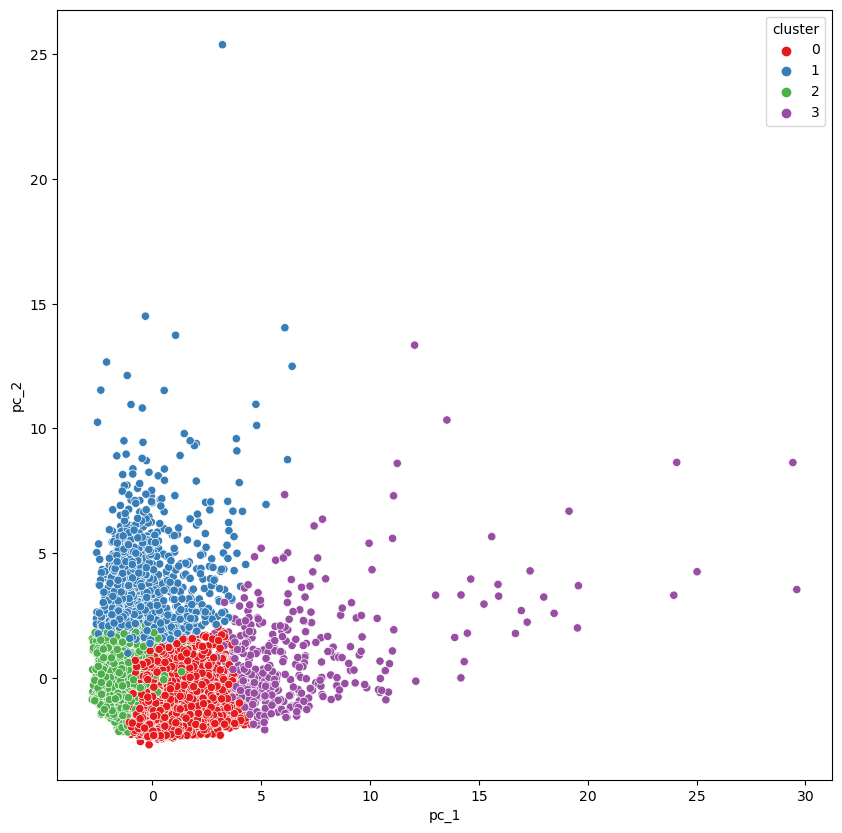

In [74]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pc_1',y='pc_2', hue='cluster', data=df6, palette='Set1')

De esta manera, mediante técnicas de machine learning se puede lograr una categorización efectiva de los clientes bancarios, lo que permite entender mejor sus comportamientos y necesidades. Esta segmentación proporciona una visión más clara de la base de clientes, facilitando la personalización de estrategias de marketing, la identificación de oportunidades de mejora en productos y servicios, y la toma de decisiones empresariales más informadas. En resumen, la segmentación de clientes es una herramienta poderosa para cualquier organización en la era moderna, permitiendo adaptarse de manera más efectiva a las necesidades cambiantes del mercado y proporcionando una experiencia más satisfactoria para los clientes.